In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np

In [2]:
parity =    np.array([[1, 0, 1, 0, 1, 0, 1, 0, 1, 0]])
value =     np.array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]])
prime =     np.array([[0, 0, 1, 1, 0, 1, 0, 1, 0, 0]])
fibonacci = np.array([[1, 1, 1, 1, 0, 1, 0, 0, 1, 0]])
mul3 =      np.array([[0, 0, 0, 1, 0, 0, 1, 0, 0, 1]])

vowel =        np.array([[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])
position =     np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [3]:
def compute_sm_parallel(tasks):
    num_tasks = len(tasks)
    num_classes = tasks[0].shape[1]

    similarity_matrix_U = np.zeros((num_classes, num_classes))
    similarity_matrix_I = np.ones((num_classes, num_classes))

    for task in tasks:
        similarity_matrix_U += ((task.T @ task) + (1 - task).T @ (1 - task)) / num_tasks
        similarity_matrix_I *= ((task.T @ task) + (1 - task).T @ (1 - task))

    return similarity_matrix_U, similarity_matrix_I

0.518504749719163 0.997433862823115 0.9987042141185174 0.9985616160267323


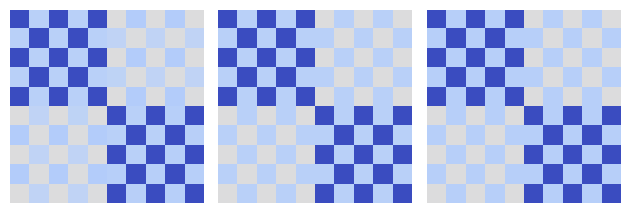

0.37824763765737307 0.9745720945899898 0.9894226020764847 0.9774373563595427


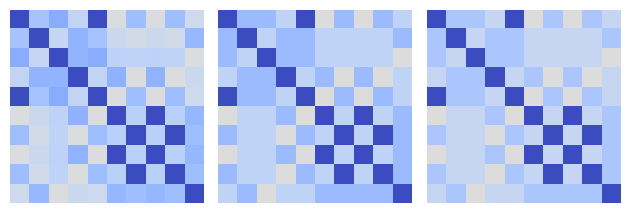

0.4657985214487965 0.933803554836263 0.9695700273892156 0.9679746680649721


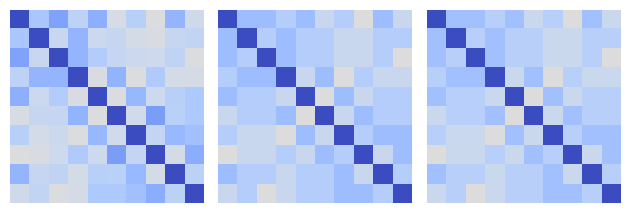

0.5236049112646693 0.9201608949303147 0.9606586167941704 0.9598341709161486


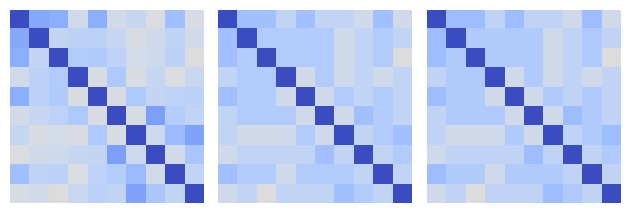

0.3377534824186661 0.9286524338255093 0.977781514409194 0.9694754869927904


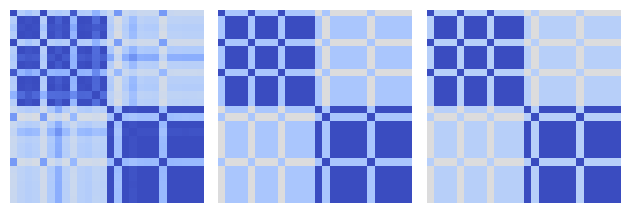

In [5]:
# digits
num_classes = 10 # digits 0...9
tasks = [parity, value, prime, fibonacci, mul3]
min_tasks = 2
num_cases = len(tasks)
cases = range(min_tasks, num_cases + 1) # tasks 2...5

pn_fa_d = np.zeros((num_cases, num_classes, num_classes))
pn_Upred_d = np.zeros((num_cases, num_classes, num_classes))
pn_Ipred_d = np.zeros((num_cases, num_classes, num_classes))
pn_Icoeff_d = np.zeros((num_cases))
path_figure_digits = list(cases)
for num_tasks in cases:
    pn_fa_d[num_tasks-2] = np.load(os.path.join('matrices', str(num_tasks) + '_digits.npy'))
    pn_Upred_d[num_tasks-2], pn_Ipred_d[num_tasks-2] = compute_sm_parallel(tasks[:num_tasks])

    # The two-dimensional domain of the fit.
    X = pn_Ipred_d[num_tasks-2] - pn_Upred_d[num_tasks-2]
    A = X.ravel()
    A = A[:,np.newaxis]
    
    Z = pn_fa_d[num_tasks-2] - pn_Upred_d[num_tasks-2]
    b = Z.ravel()
    
    c, r, rank, s = np.linalg.lstsq(A, b)

    SSres = sum((pn_fa_d[num_tasks-2] - (c*pn_Ipred_d[num_tasks-2] + (1-c)*pn_Upred_d[num_tasks-2])).ravel()**2)
    SStot = sum(pn_fa_d[num_tasks-2].ravel()**2) # no intercept (https://stats.stackexchange.com/a/26205/99681)
    # SStot = sum((pn_fa_d[num_tasks-2].ravel() - np.mean(pn_fa_d[num_tasks-2].ravel()))**2) # with intercept
    r2 = 1 - r / (pn_fa_d[num_tasks-2].size * pn_fa_d[num_tasks-2].ravel().var()) # with intercept
    rsquared = 1 - SSres/SStot

    SSres = sum((pn_fa_d[num_tasks-2] - (0.5*pn_Ipred_d[num_tasks-2] + 0.5*pn_Upred_d[num_tasks-2])).ravel()**2)
    SStot = sum(pn_fa_d[num_tasks-2].ravel()**2) # no intercept (https://stats.stackexchange.com/a/26205/99681)
    rsquared05 = 1 - SSres/SStot
    
    print(c.item(), r2.item(), rsquared, rsquared05)

    pn_Icoeff_d[num_tasks-2] = c.item()

    path_figure_digits[num_tasks-2] = os.path.join('svg', 'figureS20_sm_predicted_parallel_digits_' + str(num_tasks) + '.svg')

    fig, ax = plt.subplots(1, 3)

    ax[0].imshow(pn_fa_d[num_tasks-2], cmap='coolwarm_r', vmin=-1, vmax=1)
    ax[0].axis('off')

    ax[1].imshow(c*pn_Ipred_d[num_tasks-2] + (1-c)*pn_Upred_d[num_tasks-2], cmap='coolwarm_r', vmin=-1, vmax=1)
    ax[1].axis('off')

    ax[2].imshow(0.5*pn_Ipred_d[num_tasks-2] + 0.5*pn_Upred_d[num_tasks-2], cmap='coolwarm_r', vmin=-1, vmax=1)
    ax[2].axis('off')
    
    fig.tight_layout()
    fig.savefig(path_figure_digits[num_tasks-2])
    plt.show()
    
# letters
tasks = [vowel, position]
pn_fa_l2 = np.load(os.path.join('matrices', '2_letters.npy'))
pn_Upred_l2, pn_Ipred_l2 = compute_sm_parallel(tasks)

# The two-dimensional domain of the fit.
X = pn_Ipred_l2 - pn_Upred_l2
A = X.ravel()
A = A[:,np.newaxis]
    
Z = pn_fa_l2 - pn_Upred_l2
b = Z.ravel()
    
c, r, rank, s = np.linalg.lstsq(A, b)

SSres = sum((pn_fa_l2 - (c*pn_Ipred_l2 + (1-c)*pn_Upred_l2)).ravel()**2)
SStot = sum(pn_fa_l2.ravel()**2) # no intercept (https://stats.stackexchange.com/a/26205/99681)
# SStot = sum((pn_fa_l2.ravel() - np.mean(pn_fa_l2.ravel()))**2) # with intercept
r2 = 1 - r / (pn_fa_l2.size * pn_fa_l2.ravel().var()) # with intercept
rsquared = 1 - SSres/SStot

SSres = sum((pn_fa_l2 - (0.5*pn_Ipred_l2 + 0.5*pn_Upred_l2)).ravel()**2)
SStot = sum(pn_fa_l2.ravel()**2) # no intercept (https://stats.stackexchange.com/a/26205/99681)
rsquared05 = 1 - SSres/SStot
    
print(c.item(), r2.item(), rsquared, rsquared05)

pn_Icoeff_l2 = c.item()

path_figure_letters_2 = os.path.join('svg', 'figureS20_sm_predicted_parallel_letters_2.svg')

fig, ax = plt.subplots(1, 3)

ax[0].imshow(pn_fa_l2, cmap='coolwarm_r', vmin=-1, vmax=1)
ax[0].axis('off')

ax[1].imshow(c*pn_Ipred_l2 + (1-c)*pn_Upred_l2, cmap='coolwarm_r', vmin=-1, vmax=1)
ax[1].axis('off')

ax[2].imshow(0.5*pn_Ipred_l2 + 0.5*pn_Upred_l2, cmap='coolwarm_r', vmin=-1, vmax=1)
ax[2].axis('off')
    
fig.tight_layout()
fig.savefig(path_figure_letters_2)
plt.show()